# 1. Import Dependencies

In [1]:
# Import opencv
import cv2
# Import operating sys
import os
# Import matplotlib
from matplotlib import pyplot as plt

# 2. Setting up a Captures

In [2]:
# Setup capture to video 
cap = cv2.VideoCapture(os.path.join('data','test.mp4'))

In [3]:
# Grab a frame 
# "Ret" will obtain return value from getting the camera frame, either true or false. 
ret, frame = cap.read()

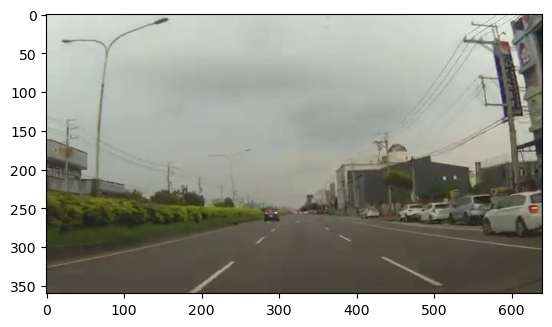

In [4]:
# Render frame 
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# Release capture
cap.release()

In [6]:
cap.read()

(False, None)

# 3. Capture Properties

In [7]:
# Setup capture to video 
cap = cv2.VideoCapture(os.path.join('data','test.mp4'))

In [8]:
# Height
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

360.0

In [9]:
# Width
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

640.0

In [10]:
# Get number of frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1805.0

In [11]:
# Frames per second
cap.get(cv2.CAP_PROP_FPS)

29.97002997002997

# 4. Working with Video Captures

In [12]:
# Establish capture
cap = cv2.VideoCapture(os.path.join('data','test.mp4'))
# Loop through each frame
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Read frame 
    ret, frame = cap.read()
    
    # Gray transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Show image
    cv2.imshow('Video Player', gray)
    
    # Breaking out of the loop
    if cv2.waitKey(10) & 0xFF == ord('q'): # 按下 q 鍵則離開迴圈! waitKey() 見說明如下:
#     if cv2.waitKey(10) == ord('q'):  
        break

# Close down everything
cap.release()
cv2.destroyAllWindows()

1. waitKey(0) will display the window infinitely until any keypress (it is suitable for image display).

2. waitKey(1) will display a frame for 1 ms, after which display will be automatically closed. Since the OS has a minimum time between switching threads, the function will not wait exactly 1 ms, it will wait at least 1 ms, depending on what else is running on your computer at that time.

3. cv2.waitkey(1) returns a 32-bit integer corresponding to the pressed key

4. 0xFF is a bit mask which sets the left 24 bits to zero, because ord() returns a value betwen 0 and 255, since your keyboard only has a limited character set.

# 5. Writing out Videos

In [13]:
# Establish capture
cap = cv2.VideoCapture(os.path.join('data','test.mp4'))

# Properties
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)

# 使用 XVID 編碼 https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html
fourcc = cv2.VideoWriter_fourcc(*'XVID') #  video codec
# Video Writer 
video_writer = cv2.VideoWriter(os.path.join('data','output.avi'), fourcc, fps, (width, height), isColor=False)  # gray: isColor=False
                                                                                        
# Loop through each frame
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Read frame 
    ret, frame = cap.read()
    
    # Gray transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Show image
    cv2.imshow('Video Player', gray)
    
    # Write out frame 
    video_writer.write(gray)
    
    # Breaking out of the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close down everything
cap.release()
cv2.destroyAllWindows()
# Release video writer
video_writer.release()

FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)

In Windows: DIVX (More to be tested and added)

In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).

FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.